# Explore here

In [10]:
# Paso 1: Carga del dataset
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

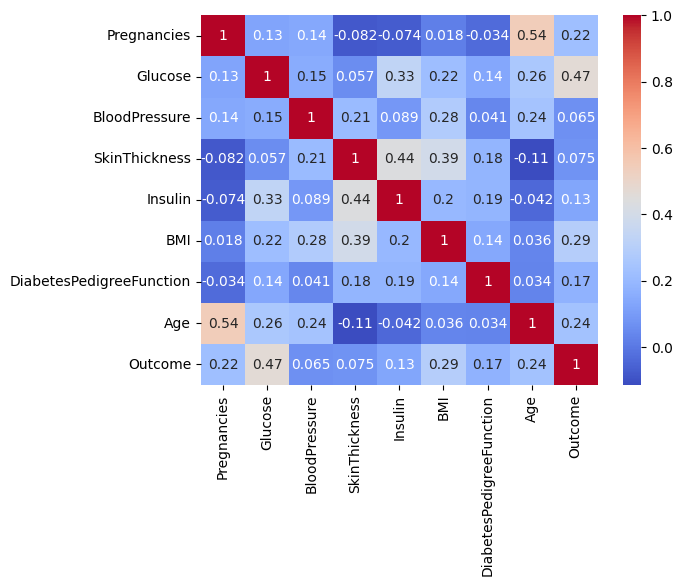

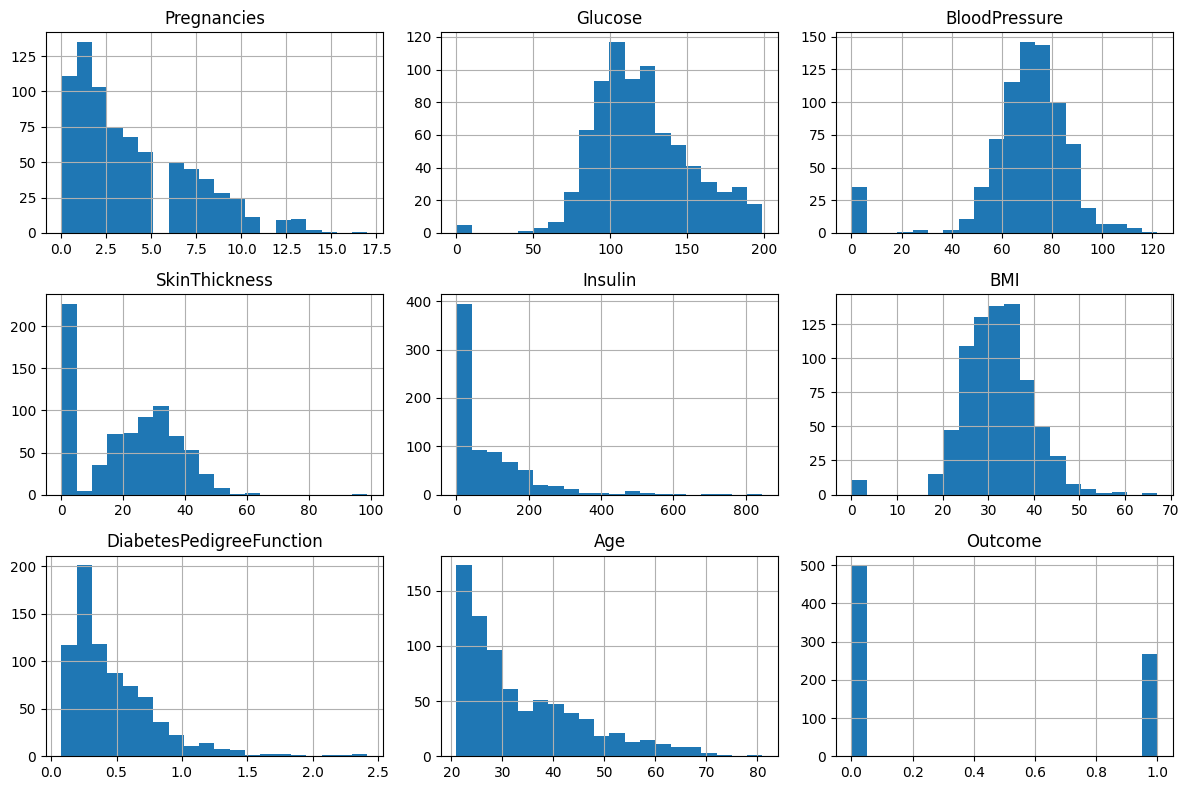

In [11]:
# Paso 2: EDA
print(df.info())
print(df.describe())
print((df == 0).sum())

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

df.hist(bins=20, figsize=(12,8))
plt.tight_layout()
plt.show()

In [12]:
# Sustituir ceros por NaN en columnas donde no debería haber valores 0
import numpy as np
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Imputar con la media
df.fillna(df.mean(), inplace=True)

In [13]:
# Paso 3: Entrenamiento del árbol de decisión con distintas funciones de pureza
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

criterios = ['gini', 'entropy']

for criterio in criterios:
    print(f"\nCriterio: {criterio}")
    clf = DecisionTreeClassifier(criterion=criterio, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Criterio: gini
Accuracy: 0.7207792207792207
[[77 22]
 [21 34]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154


Criterio: entropy
Accuracy: 0.7402597402597403
[[76 23]
 [17 38]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        99
           1       0.62      0.69      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



In [14]:
# Paso 4: Optimización con GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)
print("Mejor modelo - Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Mejores parámetros: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mejor modelo - Accuracy: 0.7272727272727273
              precision    recall  f1-score   support

           0       0.84      0.71      0.77        99
           1       0.59      0.76      0.67        55

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.75      0.73      0.73       154



In [15]:
# Paso 5: Guardar el modelo
import joblib
joblib.dump(best_model, 'modelo_diabetes_arbol.pkl')

['modelo_diabetes_arbol.pkl']

In [16]:
# Paso 4: Entrenar modelo con Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7532467532467533
[[80 19]
 [19 36]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [17]:
# Paso 5: Guardar el modelo
import joblib
joblib.dump(rf_model, 'modelo_diabetes_rf.pkl')

['modelo_diabetes_rf.pkl']

In [19]:
# Paso 6: Predecir un nuevo paciente
nuevo_paciente = pd.DataFrame([{
    'Pregnancies': 2,
    'Glucose': 130,
    'BloodPressure': 70,
    'SkinThickness': 28,
    'Insulin': 85,
    'BMI': 32.5,
    'DiabetesPedigreeFunction': 0.55,
    'Age': 34
}])

modelo_cargado = joblib.load('modelo_diabetes_rf.pkl')
prediccion = modelo_cargado.predict(nuevo_paciente)
probabilidad = modelo_cargado.predict_proba(nuevo_paciente)

print("Diagnóstico:", "Diabético" if prediccion[0] == 1 else "No diabético")
print(f"Probabilidad de NO tener diabetes: {probabilidad[0][0]:.2%}")
print(f"Probabilidad de SÍ tener diabetes: {probabilidad[0][1]:.2%}")

Diagnóstico: Diabético
Probabilidad de NO tener diabetes: 46.00%
Probabilidad de SÍ tener diabetes: 54.00%
